In [9]:
import socket
import pandas as pd
import matplotlib.pyplot as plt
import time
from scipy import signal
import numpy as np

In [10]:
def filterSignal(sig):
    t = np.linspace(0, 1, 200, False) 
    sos1 = signal.butter(10, [45,55], 'bandstop', fs=1000, output='sos')
    sos2 = signal.butter(10, [95,105], 'bandstop', fs=1000, output='sos')
    sos4 = signal.butter(2, 30, 'low', fs=1000, output='sos')
    sos3 = signal.butter(1, 0.57, 'high', fs=1000, output='sos')
    filtered = signal.sosfilt(sos1, sig)
    filtered = signal.sosfilt(sos2, filtered)
    filtered = signal.sosfilt(sos3, filtered)
    filtered = signal.sosfilt(sos4, filtered)
    return filtered

In [20]:
df_full = pd.DataFrame()
df_full['Marker'] = 66
#path = 'lev_3_defected/'
for i in range(200):
    df = pd.read_excel(str(i) + '.xlsx')
    #df.to_excel(path + str(i-100) + '.xlsx')
    df['Detector 4'] = filterSignal(df['Detector 4'])
    df_full = pd.concat([df_full, pd.DataFrame(df['Detector 4']).transpose()], ignore_index = True)
    df_full['Marker'][i] = df['Marker'][180]

In [21]:
#df_full.to_excel('result.xlsx', index = True)

In [22]:
# 1 - Target, 2 - non target
df = df_full[df_full['Marker'] == 1]
divider = len(df)
divider

28

a = list()
a.extend(range(100))
df.drop(columns=a, inplace = True)

In [23]:
#path = 'graphics/dan_4_target/'

In [24]:
num_average_samples = 4
round(len(df) / num_average_samples)

7

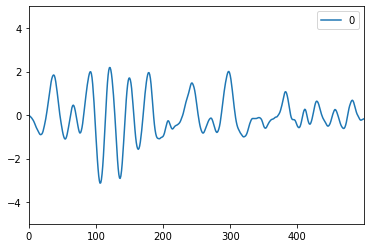

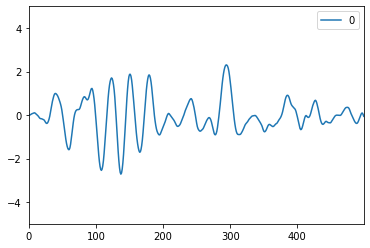

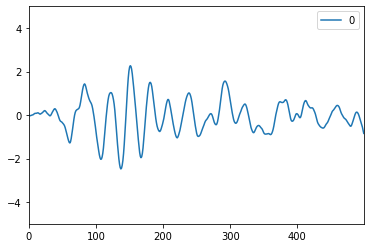

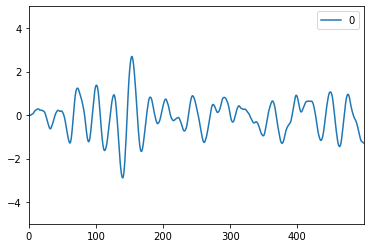

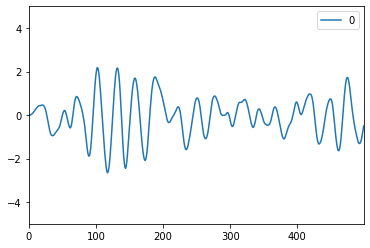

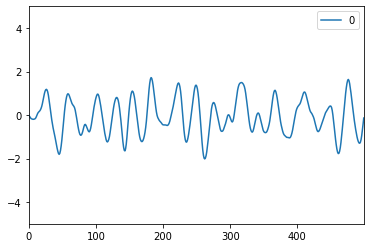

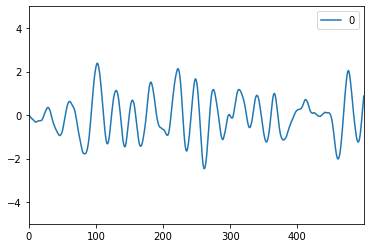

In [25]:
for c in range(round(len(df) / num_average_samples)):
    #c = 1
    df_2 = df.iloc[c*1:c*1+num_average_samples]
    res = list()
    for i in range(0,500):
        res.append(df_2[i].sum())
    res2 = pd.DataFrame(res)
    res2 /= 5 #divider
    ax1 = res2.plot()
    ax1.set_ylim(-5,5)
    #res2.plot()
    #plt.savefig(path + str(c) + '.png')